<a href="https://www.kaggle.com/code/ziadhamadafathy/sign-language-classification?scriptVersionId=139569167" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import glob as gb
import cv2
import tensorflow as tf
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# Preparing data

In [2]:
data_training = '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/'
data_test = '/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/'

In [3]:
for folder in  os.listdir(data_training): 
    files = gb.glob(pathname= str( data_training + folder + '/*.jpg'))
    print(f'For data , found {len(files)} in folder {folder}')

For data , found 3000 in folder N
For data , found 3000 in folder R
For data , found 3000 in folder space
For data , found 3000 in folder B
For data , found 3000 in folder I
For data , found 3000 in folder del
For data , found 3000 in folder F
For data , found 3000 in folder H
For data , found 3000 in folder E
For data , found 3000 in folder U
For data , found 3000 in folder M
For data , found 3000 in folder X
For data , found 3000 in folder K
For data , found 3000 in folder Q
For data , found 3000 in folder Y
For data , found 3000 in folder S
For data , found 3000 in folder G
For data , found 3000 in folder A
For data , found 3000 in folder O
For data , found 3000 in folder T
For data , found 3000 in folder V
For data , found 3000 in folder Z
For data , found 3000 in folder C
For data , found 3000 in folder P
For data , found 3000 in folder L
For data , found 3000 in folder W
For data , found 3000 in folder D
For data , found 3000 in folder nothing
For data , found 3000 in folder J


In [4]:
code = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9, 'K':10, 'L':11, 'M':12, 'N':13, 'O':14,
        'P':15, 'Q':16, 'R':17, 'S':18, 'T':19, 'U':20, 'V':21, 'W':22, 'X':23, 'Y':24, 'Z':25, 'del':26,'nothing':27,
        'space':28}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [5]:
s = 100
X_train = []
y_train = []
for folder in  os.listdir(data_training) : 
    files = gb.glob(pathname= str( data_training + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        info = np.iinfo(image.dtype) # Get the information of the incoming image type
        image = image.astype(np.float64) / info.max # normalize the data to 0 - 1
        image = 255 * image # Now scale by 255
        image = image.astype(np.uint8)
        image_array = cv2.resize(image , (s,s))
        image_array = image_array.astype(np.uint8)
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [6]:
print(f'we have {len(X_train)} items in X_train')
print(f'we have {len(y_train)} items in Y_train')

we have 87000 items in X_train
we have 87000 items in Y_train


In [7]:
test = []
files = gb.glob(pathname= str( data_test + '/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    test.append(list(image_array))

In [8]:
print(f'we have {len(test)} items in test')

we have 28 items in test


# Visualizing for some our data

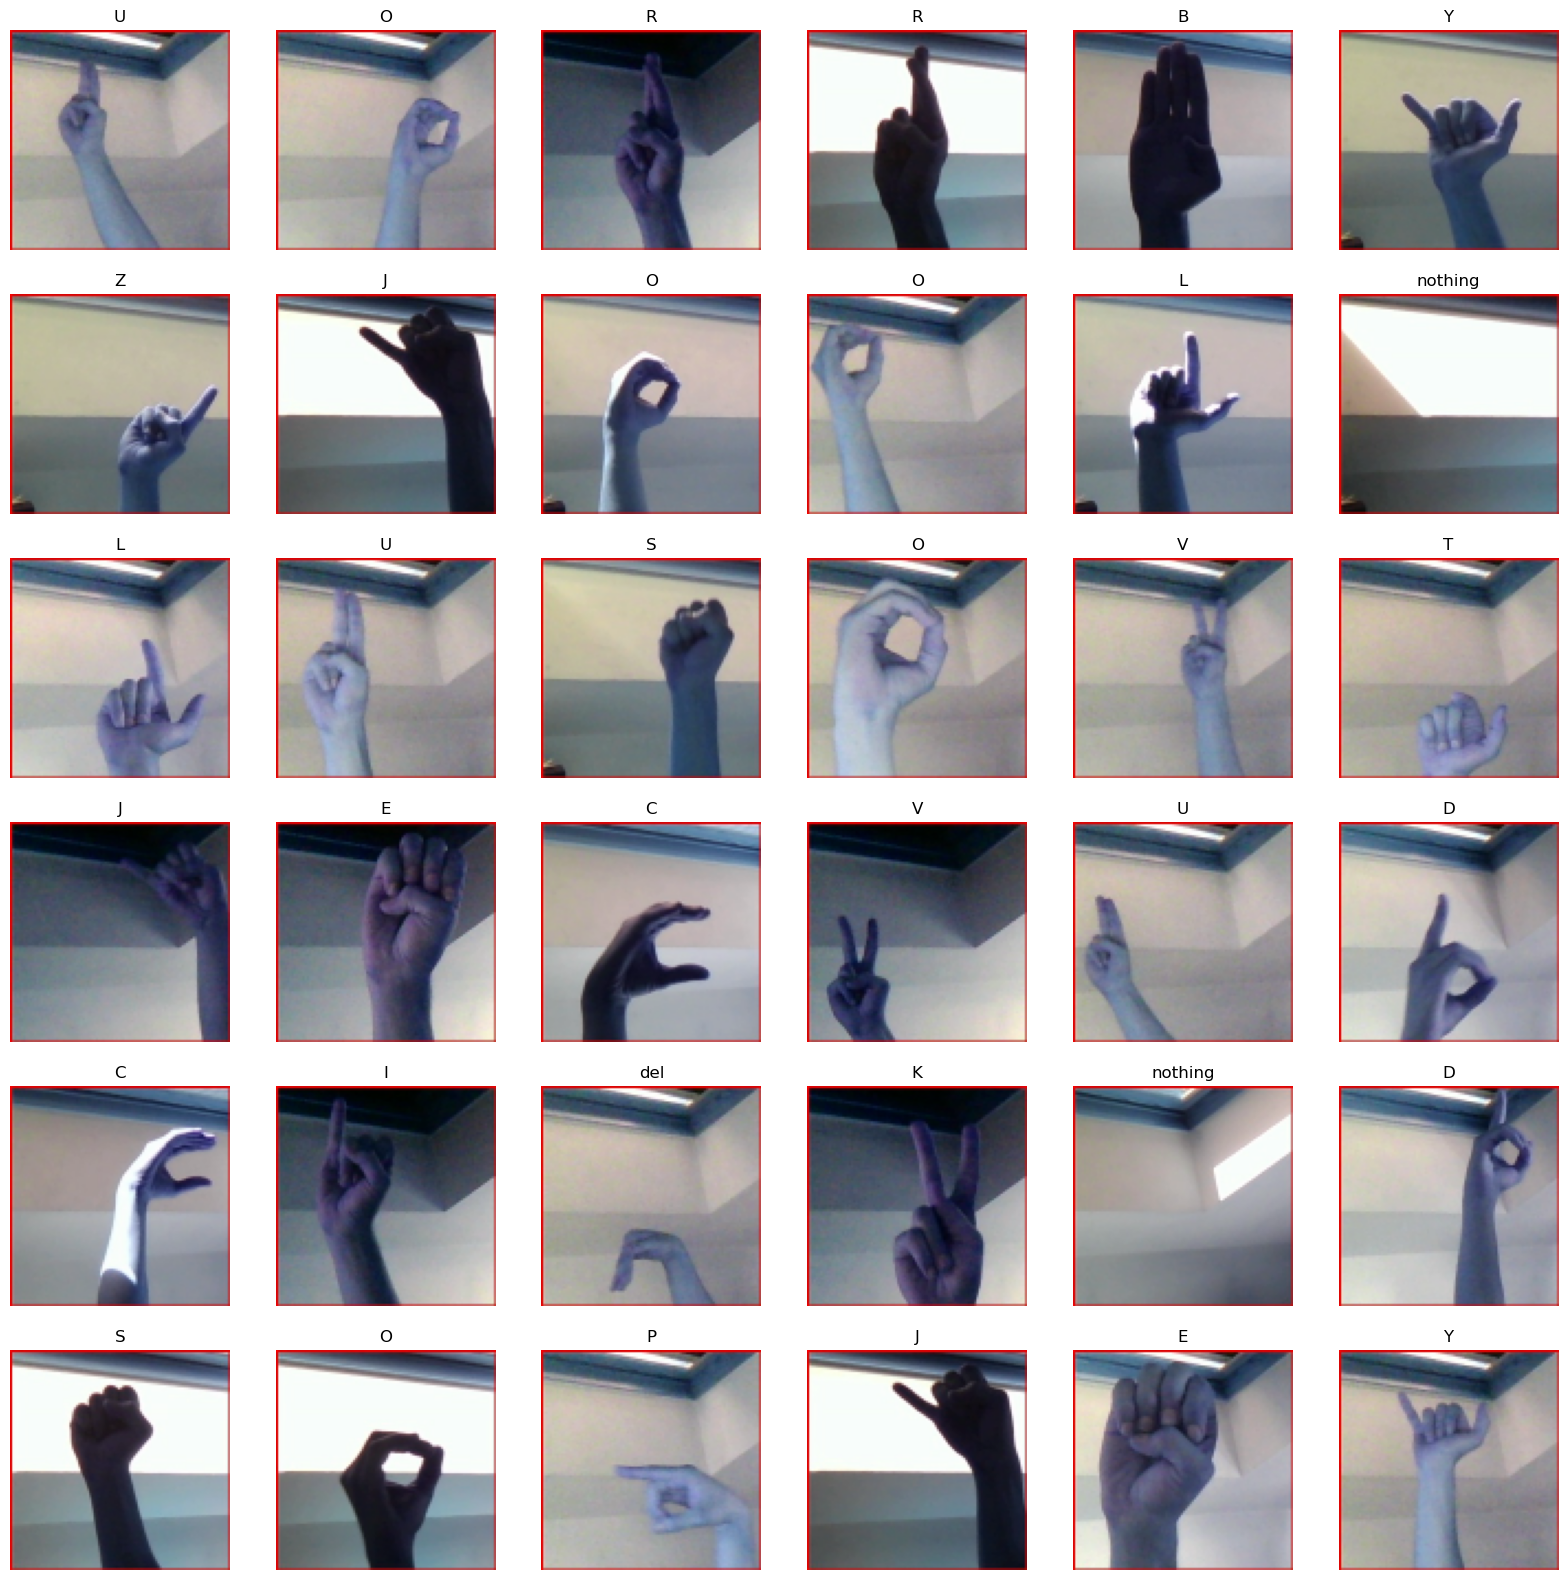

In [9]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

# Splitting data for training, validation and testing

In [10]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X_train, y_train, train_size=0.8, shuffle=True, random_state=100)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, train_size=0.5, shuffle=True, random_state=100)
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Building our Model

In [11]:
KerasModel = Sequential([
        Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        Conv2D(32,kernel_size=(3,3),activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(64,kernel_size=(5,5),activation='relu'),    
        Conv2D(64,kernel_size=(5,5),activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(128,kernel_size=(5,5),activation='relu'),
        Conv2D(128,kernel_size=(5,5),activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(256,kernel_size=(3,3),activation='relu'),
        Conv2D(256,kernel_size=(3,3),activation='relu'),
        Flatten() ,    
        Dense(512,activation='relu') ,    
        Dense(512,activation='relu') ,    
        Dense(256,activation='relu') ,
        Dense(256,activation='relu') ,
        Dense(128,activation='relu') ,
        Dense(29,activation='softmax') ,    
        ])

In [12]:
opt = tf.keras.optimizers.Adam()
KerasModel.compile(optimizer =opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 64)        51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 40, 40, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 64)       0         
 2D)                               

In [14]:
epochs = 15
ThisModel = KerasModel.fit(X_train, y_train, 
                           epochs=epochs, 
                           batch_size=64, 
                           validation_data=(X_val, y_val), 
                           verbose=1, 
                           shuffle=False)

Epoch 1/15
1088/1088 [==============================] - 65s 45ms/step - loss: 2.1489 - accuracy: 0.3375 - val_loss: 0.6473 - val_accuracy: 0.7790
Epoch 2/15
1088/1088 [==============================] - 48s 44ms/step - loss: 0.4530 - accuracy: 0.8488 - val_loss: 0.3768 - val_accuracy: 0.8802
Epoch 3/15
1088/1088 [==============================] - 48s 44ms/step - loss: 0.2540 - accuracy: 0.9201 - val_loss: 0.1434 - val_accuracy: 0.9533
Epoch 4/15
1088/1088 [==============================] - 49s 45ms/step - loss: 0.1572 - accuracy: 0.9522 - val_loss: 0.1379 - val_accuracy: 0.9567
Epoch 5/15
1088/1088 [==============================] - 48s 44ms/step - loss: 0.1350 - accuracy: 0.9610 - val_loss: 0.1566 - val_accuracy: 0.9580
Epoch 6/15
1088/1088 [==============================] - 49s 45ms/step - loss: 0.1145 - accuracy: 0.9690 - val_loss: 0.0886 - val_accuracy: 0.9724
Epoch 7/15
1088/1088 [==============================] - 48s 44ms/step - loss: 0.1062 - accuracy: 0.9723 - val_loss: 0.1251 -

In [15]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test, batch_size=64)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

136/136 [==============================] - 2s 13ms/step - loss: 0.0386 - accuracy: 0.9906
Test Loss is 0.038648571819067
Test Accuracy is 0.9905747175216675


272/272 [==============================] - 2s 8ms/step


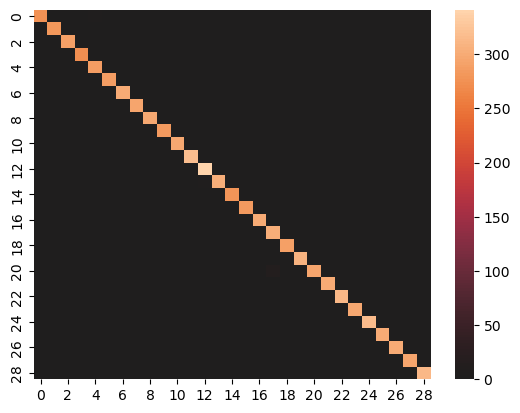

In [16]:
y_pred = KerasModel.predict(X_test).argmax(axis=1)
CM = confusion_matrix(y_test, y_pred)

sns.heatmap(CM, center=True)
plt.show()

In [17]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       283
           1       0.99      1.00      1.00       280
           2       0.99      1.00      1.00       289
           3       0.99      0.99      0.99       276
           4       0.96      0.99      0.97       289
           5       1.00      0.99      0.99       289
           6       1.00      1.00      1.00       299
           7       1.00      1.00      1.00       294
           8       0.99      0.99      0.99       302
           9       0.99      1.00      0.99       286
          10       1.00      0.99      0.99       302
          11       1.00      1.00      1.00       318
          12       0.98      0.99      0.99       345
          13       0.99      0.99      0.99       306
          14       1.00      0.99      0.99       282
          15       1.00      1.00      1.00       286
          16       0.98      1.00      0.99       299
          17       0.95    

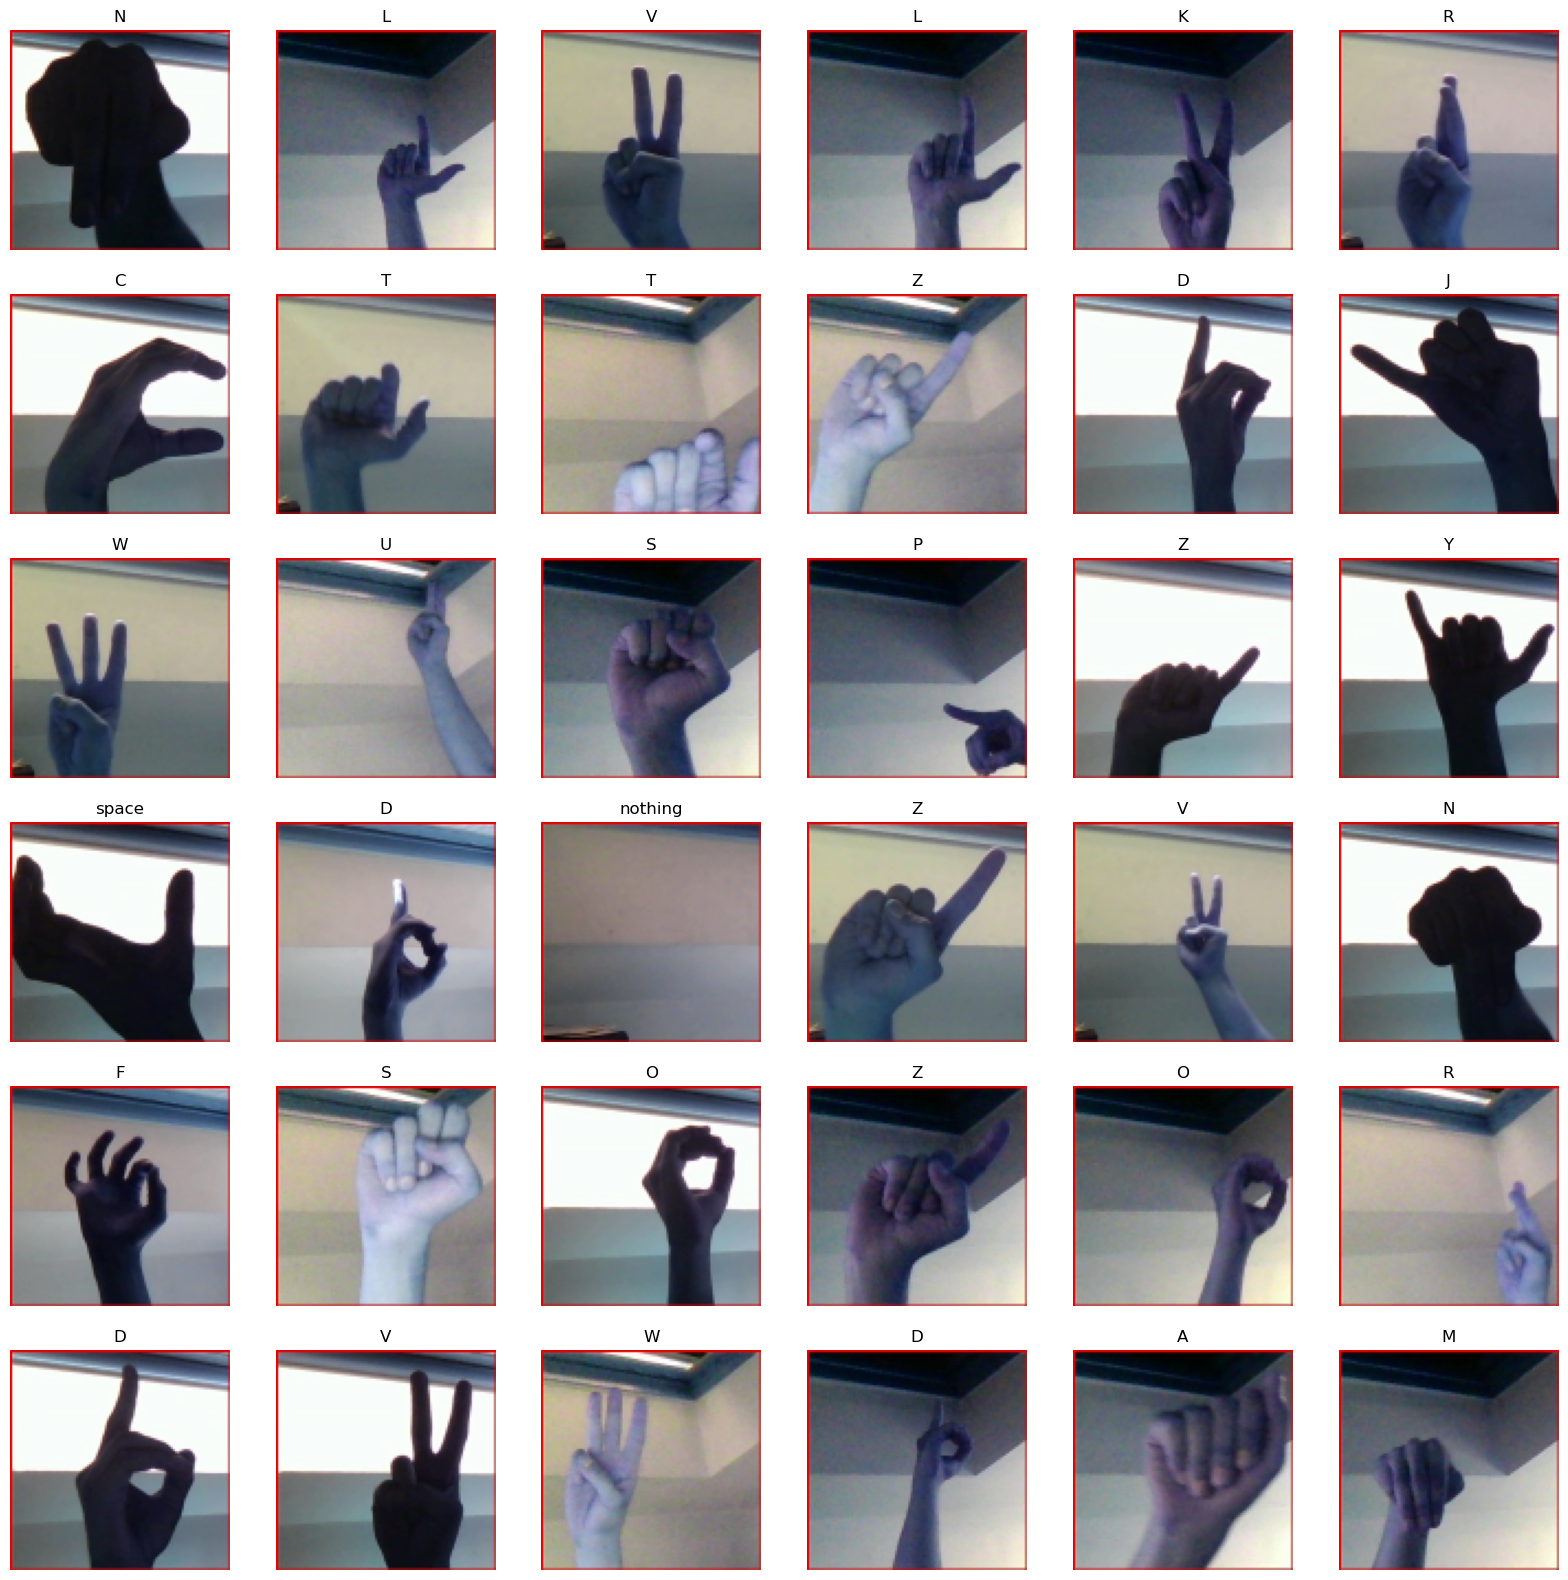

In [18]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_pred[i]))

#### Predict testing data

In [19]:
y_pred_test = KerasModel.predict(np.array(test)).argmax(axis=1)

1/1 [==============================] - 0s 23ms/step


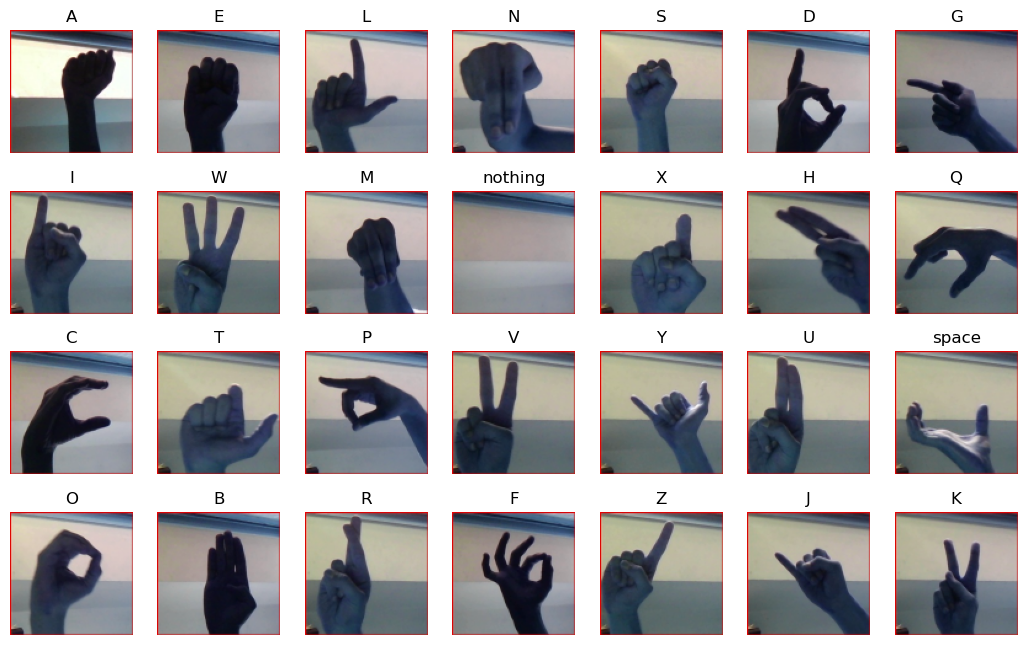

In [20]:
plt.figure(figsize=(13,8))
for i in range(0,len(test)): 
    plt.subplot(4,7,i+1)
    plt.imshow(test[i])    
    plt.axis('off')
    plt.title(getcode(y_pred_test[i]))